In [1]:
%gui qt5

import napari
import skimage as sk
import numpy as np
import os
import tifffile
import cv2
import skimage.io
import matplotlib.pyplot as plt

In [39]:
# Load in the files given the image 

neuron_dir = "C:/Users/Fungj/Google Drive/Masters Project/pyNeuroDCNN/Neuron1" # change this directory
neuron_file = "000_Live6-12-2018_16-20-05.tif" # change file name

neuron_image = skimage.io.imread(os.path.join(neuron_dir,neuron_file))

# view the image 
viewer = napari.view_image(neuron_image)

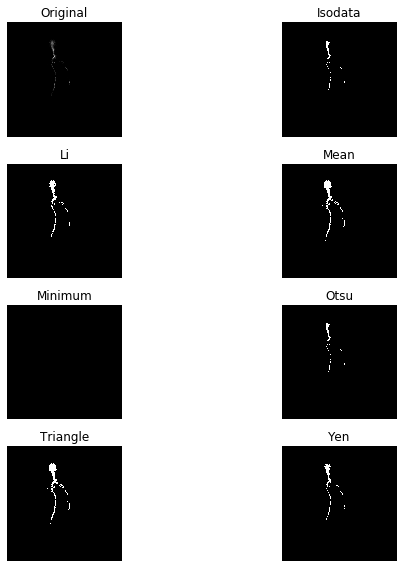

In [70]:
# try all the available thresholding methods from skimage on OG image
from skimage.filters import try_all_threshold

img = neuron_image[28][:] # take layer 29 for example

fig, ax = try_all_threshold(img, figsize = (10, 8), verbose = False)
plt.show()


1489.9303437955996


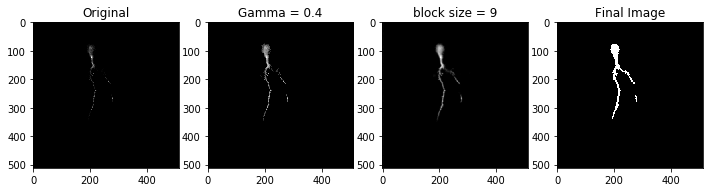

In [79]:
# THIS CELL DOES A GAMMA -> LOCAL THRESH -> GLOBAL THRESHOLD

from skimage import filters 
from skimage import exposure
# orig image is for comparison
orig_img = neuron_image[28][:]


gamma_lvl = 0.4
block_size = 9
# turn up exposure/contrast
proc_img1 = exposure.adjust_gamma(orig_img, gamma_lvl)
# perform local threshold
proc_img2 = filters.threshold_local(proc_img1, block_size)
# perform a selection of threshold methods (In this case, Yen)
calc_thresh = filters.threshold_yen(proc_img2)
print(calc_thresh)
fin_img1 = proc_img2 > calc_thresh

# OG image
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.title('Original')
plt.imshow(orig_img, cmap ='gray')
# contrast
plt.subplot(142)
plt.title('Gamma = ' + str(gamma_lvl))
plt.imshow(proc_img1, cmap ='gray')
# Adaptive threshold
plt.subplot(143)
plt.title('block size = ' + str(block_size))
plt.imshow(proc_img2, cmap ='gray')
# final segmented image
plt.subplot(144)
plt.title('Final Image')
plt.imshow(fin_img1, cmap ='gray', interpolation = 'nearest')

plt.show()


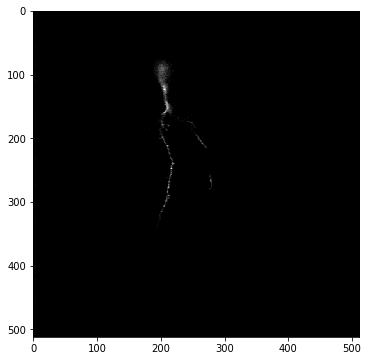

In [71]:
plt.figure(figsize=(12,6))
plt.imshow(orig_img, cmap = 'gray')

4.294098228856868


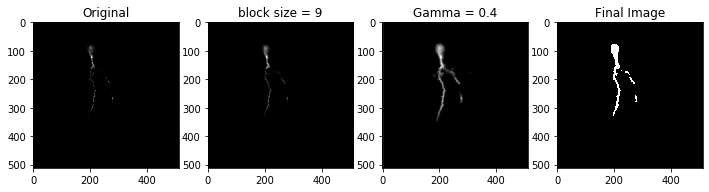

In [81]:
# THIS CELL DOES A LOCAL THRESH -> CONTRAST ADJUST -> GLOBAL THRESHOLD

from skimage import filters 
from skimage import exposure
# orig image is for comparison
orig_img = neuron_image[28][:]


gamma_lvl = 0.4
block_size = 9

# perform local threshold
proc_img1 = filters.threshold_local(orig_img, block_size)

# turn up exposure/contrast
proc_img2 = exposure.adjust_gamma(proc_img1, gamma_lvl)

# perform a selection of threshold methods (In this case, Yen)
calc_thresh = filters.threshold_otsu(proc_img2)
print(calc_thresh)
fin_img2 = proc_img2 > calc_thresh

# OG image
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.title('Original')
plt.imshow(orig_img, cmap ='gray')
# Adaptive threshold
plt.subplot(142)
plt.title('block size = ' + str(block_size))
plt.imshow(proc_img1, cmap ='gray')
# Contrast adjustment
plt.subplot(143)
plt.title('Gamma = ' + str(gamma_lvl))
plt.imshow(proc_img2, cmap ='gray')
# final segmented image
plt.subplot(144)
plt.title('Final Image')
plt.imshow(fin_img2, cmap ='gray', interpolation = 'nearest')

plt.show()